In [63]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [64]:
# Load data into python environment

data = pd.read_csv('titanic_dataset.csv')

In [65]:
# Set 'PassengerId' column as index

data.set_index('PassengerId', inplace=True)

In [66]:
# Display first five rows of dataset

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# Displaying number of rows and columns of data

data.shape

(891, 11)

In [68]:
# Checking the datatype of each column

data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [69]:
# Displaying all the information regarding data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 2. Do all the necessary pre-processing steps

In [70]:
# To check whether any null values are present in data

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Null value are present in Age,Cabin and Embarked columns

In [71]:
# Checking the distribution of columns
freqgraph = data.select_dtypes(include = ['float','int'])

In [72]:
freqgraph

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


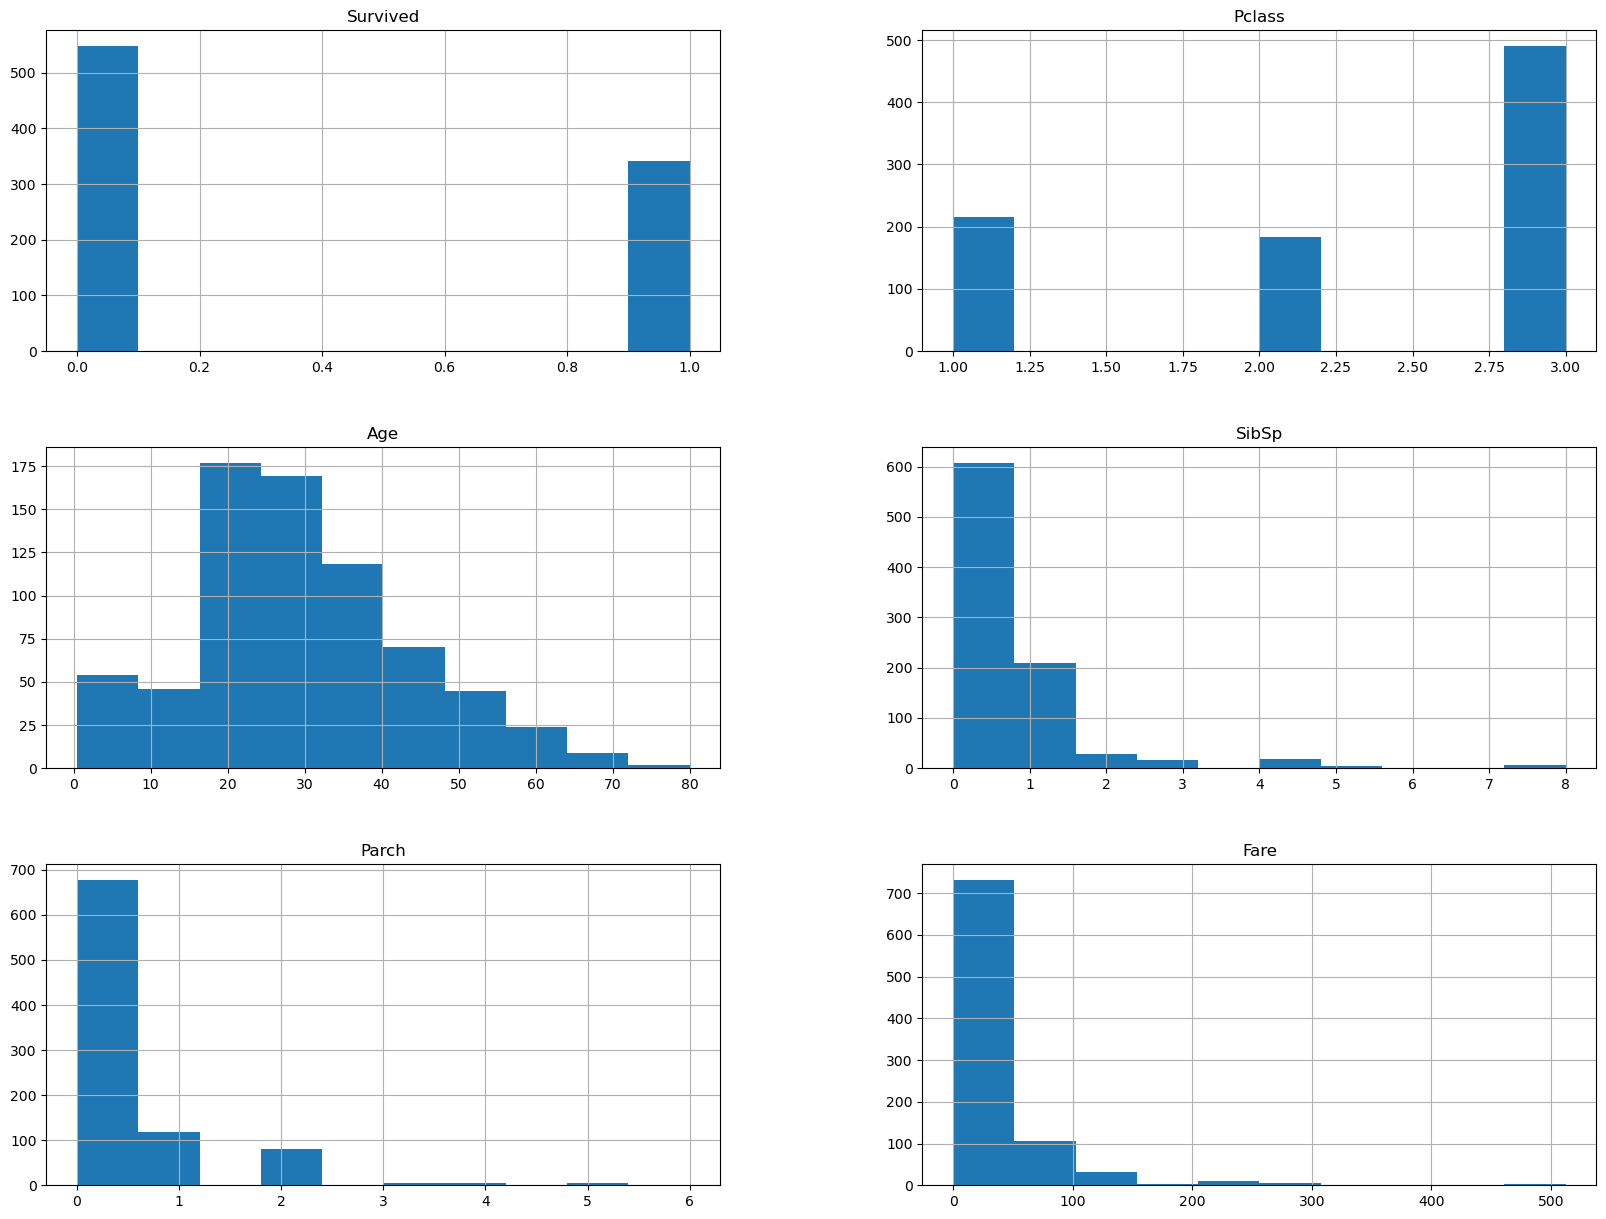

In [73]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [74]:
# Since the data in 'Age' column is slightly skewed we are filling the missing values with median.
data['Age'] = data['Age'].fillna(data['Age'].median())

In [75]:
data['Age'].isna().sum()

0

In [76]:
# Filling the missing values of Cabin,Embarked columns with mode as they are of object data type
for i in ['Cabin','Embarked']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [78]:
# To check whether null values are present in data
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Checking for Outliers

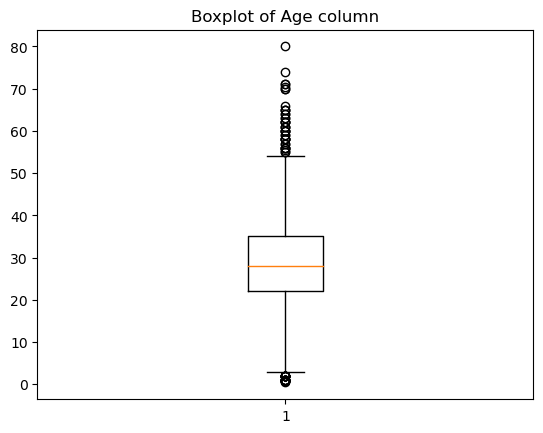

In [79]:
# Detecting outliers in Age column using IQR method
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')
plt.show()

In [80]:
#Finding outliers using IQR method
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [81]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

13.0
2.5
54.5


In [82]:
outlier = []
for x in data['Age']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [83]:
# Finding the index of outliers
ind1 = data[(data["Age"] > up_limit)|(data["Age"] < low_limit)].index

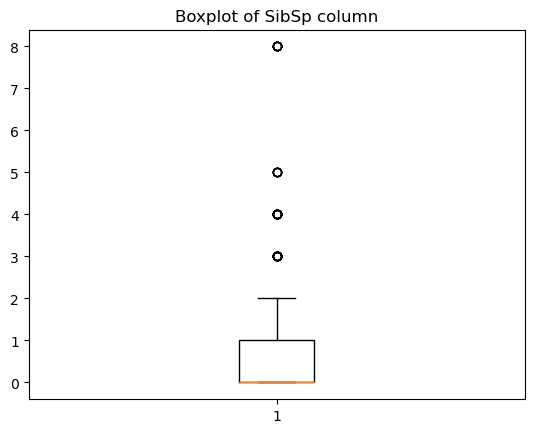

In [84]:
# Detecting outliers in SibSp column using IQR method
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp column')
plt.show()

In [85]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [86]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

1.0
-1.5
2.5


In [87]:
outlier = []
for x in data['SibSp']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [88]:
# Finding the index of outliers
ind2 = data[(data["SibSp"] > up_limit)|(data["SibSp"] < low_limit)].index

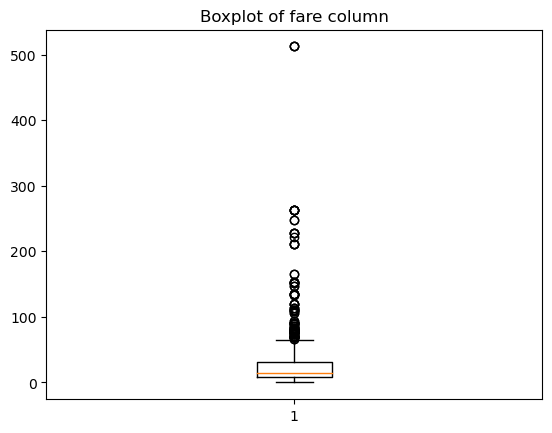

In [89]:
# Detecting outliers in Fare column using IQR method
plt.boxplot(data['Fare'])
plt.title('Boxplot of fare column')
plt.show()

In [90]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [91]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

23.0896
-26.724
65.6344


In [92]:
outlier = []
for x in data['Fare']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [93]:
# Finding the index of outliers
ind3 =data[(data["Fare"] > up_limit)|(data["Fare"] < low_limit)].index 

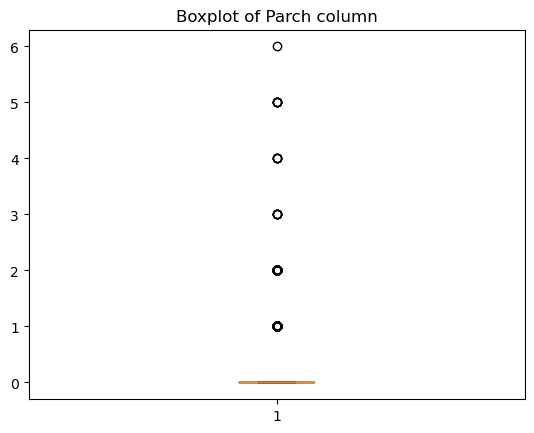

In [94]:
# Detecting outliers in Fare column using IQR method
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch column')
plt.show()

In [95]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [96]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

0.0
0.0
0.0


In [97]:
outlier = []
for x in data['Parch']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [98]:
# Finding the index of outliers
ind4 =data[(data["Fare"] > up_limit)|(data["Fare"] < low_limit)].index 

In [ ]:
# Outliers are not removed as it causes loss of lot of information from data

In [ ]:
# Since data in each columns are of different range,scaling is done

### Min-Max Scaling

In [99]:
# Dropping all the columns containing categorical data
# Target column - 'Survived'

X = data.drop(["Survived","Cabin","Name","Sex","Ticket","Embarked"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [100]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
X= minmax.fit_transform(X)  #Performing MinMax scaling
X

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.34656949, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [101]:
X = pd.DataFrame(X)         
X.columns = ["Pclass","Age","SibSp","Parch","Fare"] # Giving the columns their respective names
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.346569,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


#### Splitting features and target

In [102]:
Y = data['Survived']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,Y, test_size=0.25,random_state = 42)

### Create KNN and SVM models

In [103]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  model_knn = knn.fit(xtrain,ytrain)
  y_pred_knn = model_knn.predict(xtest)
  acc = accuracy_score(ytest,y_pred_knn)
  metric_k.append(acc)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [104]:
metric_k

[0.6771300448430493,
 0.6771300448430493,
 0.6771300448430493,
 0.6995515695067265,
 0.7130044843049327,
 0.7219730941704036,
 0.7219730941704036,
 0.7130044843049327,
 0.7085201793721974,
 0.695067264573991,
 0.6816143497757847,
 0.7040358744394619]

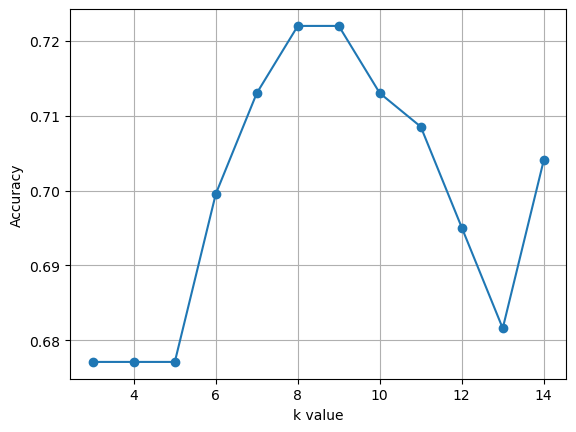

In [105]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [144]:
# n values are 8,9

In [106]:
knn = KNeighborsClassifier(n_neighbors=8)
model = knn.fit(xtrain,ytrain)
y_pred_knn = model.predict(xtest)

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [107]:
# Finding confusion matrix,precision,accuracy and recall
print(confusion_matrix(ytest,y_pred_knn))
print(accuracy_score(ytest,y_pred_knn))
print(precision_score(ytest,y_pred_knn))
print(recall_score(ytest,y_pred_knn))

[[120  14]
 [ 48  41]]
0.7219730941704036
0.7454545454545455
0.4606741573033708


### SVM Model

In [108]:
from sklearn.svm import SVC   #support vector classifier

In [109]:
svm_clf = SVC(kernel = 'rbf' )   #creating instance

In [111]:
model1 = svm_clf.fit(xtrain,ytrain)

In [112]:
ypred_svm = model1.predict(xtest)

In [113]:
# checking efficiency of the model
from sklearn.metrics import confusion_matrix, accuracy_score

In [115]:
confusion_matrix(ytest,ypred_svm)

array([[111,  23],
       [ 39,  50]], dtype=int64)

In [116]:
accuracy_score(ytest,ypred_svm)

0.7219730941704036

In [28]:
#linear

In [117]:
svm_clf_linear = SVC(kernel='linear')

In [118]:
svm_model_linear=svm_clf.fit(xtrain,ytrain)

In [119]:
y_pred_svm_linear =svm_model_linear.predict(xtest)

In [120]:
confusion_matrix(ytest,y_pred_svm_linear)

array([[111,  23],
       [ 39,  50]], dtype=int64)

In [121]:
accuracy_score(ytest,y_pred_svm_linear)

0.7219730941704036

In [34]:
# polynomial

In [122]:
svm_clf_linear=SVC(kernel='poly')

In [123]:
svm_model_poly=svm_clf.fit(xtrain,ytrain)

In [124]:
y_pred_svm_poly=svm_model_poly.predict(xtest)

In [125]:
confusion_matrix(ytest,y_pred_svm_poly)

array([[111,  23],
       [ 39,  50]], dtype=int64)

In [126]:
accuracy_score(ytest,y_pred_svm_poly)

0.7219730941704036

### Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
LRmodel = LogisticRegression()
LRmodel = LRmodel.fit(xtrain,ytrain)

In [129]:
score_LR = LRmodel.score(xtest,ytest)

In [130]:
score_LR

0.7399103139013453

### K-Fold Cross Validation

In [131]:
from sklearn.model_selection import KFold

In [132]:
kfold_validator = KFold(10)

In [133]:
for train_index, test_index in kfold_validator.split(X,Y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cv_result = cross_val_score(LRmodel,X,Y,cv = kfold_validator)

In [136]:
cv_result

array([0.61111111, 0.6741573 , 0.74157303, 0.62921348, 0.71910112,
       0.71910112, 0.70786517, 0.74157303, 0.74157303, 0.76404494])

In [137]:
# Mean of result
np.mean(cv_result)

0.7049313358302123

### Stratified Cross - Validation

In [138]:
# Importing necessary libraries
from sklearn.model_selection import StratifiedKFold

In [139]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [140]:
for train_index, test_index in skfold_validator.split(X,Y):
    print('Training index: ',train_index)
    print('Testing index: ',test_index)

Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [141]:
skcv_result = cross_val_score(LRmodel,X,Y,cv = skfold_validator)

In [142]:
skcv_result

array([0.62222222, 0.64044944, 0.69662921, 0.69662921, 0.74157303,
       0.69662921, 0.71910112, 0.75280899, 0.73033708, 0.74157303])

In [143]:
# Mean of result
np.mean(skcv_result)

0.7037952559300875

### Conclusion

1. KNN Model - Accuracy : 0.7219730941704036
2. SVM Models - Accuracy
   linear     : 0.7219730941704036,
   rbf        : 0.7219730941704036,
   polynomial : 0.7219730941704036
3. K fold Cross Validation Model - Average Accuracy Score : 0.7049313358302123
4. Stratified Cross Validation Model - Average Accuracy Score : 0.7037952559300875